In [2]:

import tensorflow as tf
from tensorflow.keras import models, layers
import matplotlib.pyplot as plt

In [3]:
BATCH_SIZE = 32
IMAGE_SIZE = 256 # pixel size
CHANNELS = 3 # RGB
EPOCHS = 20

In [5]:
dataset=tf.keras.preprocessing.image_dataset_from_directory(
    "C:\\Users\\Besitzer\\code\\TOMETO DEEP LEARNING",
    shuffle=True,
    image_size=(IMAGE_SIZE,IMAGE_SIZE),
    batch_size= BATCH_SIZE
)

Found 16011 files belonging to 11 classes.


In [6]:
class_names= dataset.class_names
class_names

['.ipynb_checkpoints',
 'Tomato_Bacterial_spot',
 'Tomato_Early_blight',
 'Tomato_Late_blight',
 'Tomato_Leaf_Mold',
 'Tomato_Septoria_leaf_spot',
 'Tomato_Spider_mites_Two_spotted_spider_mite',
 'Tomato__Target_Spot',
 'Tomato__Tomato_YellowLeaf__Curl_Virus',
 'Tomato__Tomato_mosaic_virus',
 'Tomato_healthy']

(32, 256, 256, 3)
[ 6  8  6  8  3  7  5  5  1  1  8  1  5  5  6  4  8  6 10  8  3  2  7  8
  9  3  7  3  8  8  8 10]


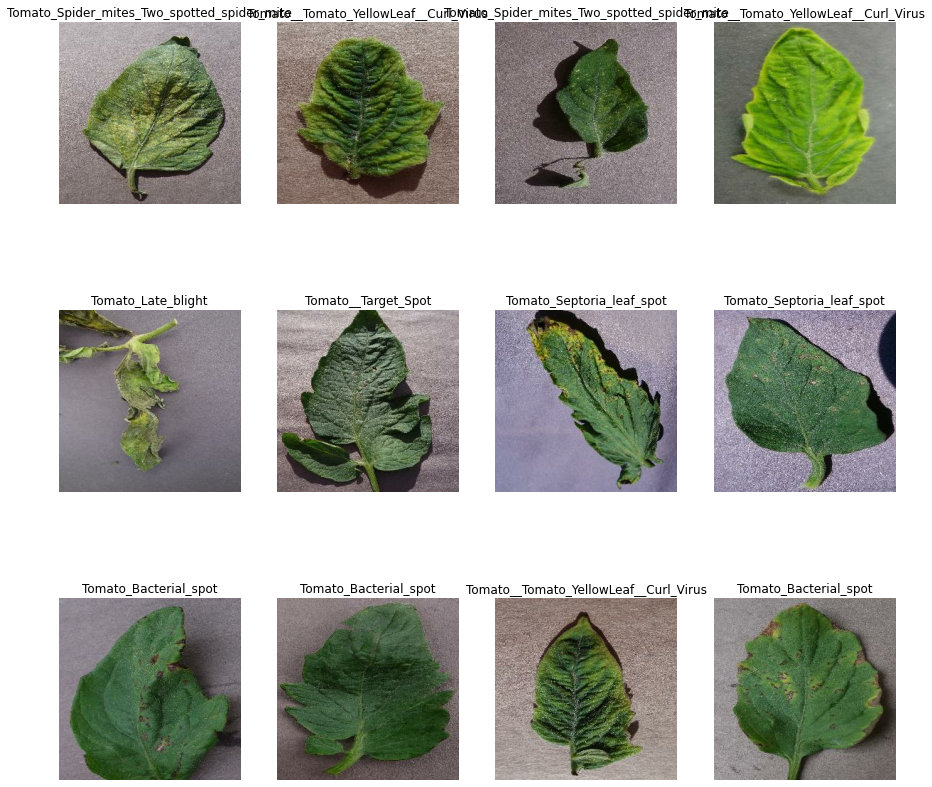

In [7]:
plt.figure(figsize=(15,15)) # to show image in bigger size
for image_batch, labels_batch in dataset.take(1): # from dataset.take(1) give output for 32 size batch/ and 256 is piyel size and 3 means color channel.
    print(image_batch.shape)
    print(labels_batch.numpy())
    for i in range(12): # to show 12 image
        ax = plt.subplot(3,4,i+1)
        plt.imshow(image_batch[i].numpy().astype("uint8")) # convert tensor into numpy
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [8]:
train_size = 0.8 # Training size 80%
len(dataset)*train_size

400.8

In [9]:
train_ds = dataset.take(400) # take first 54 batch means 54*32 image
len(train_ds)

400

In [10]:
test_ds= dataset.skip(400) # take batch before 54
len(test_ds)

101

In [11]:
val_size=0.1   # Take 10% for validation
len(dataset)*val_size

50.1

In [12]:
val_ds = test_ds.take(50)
len(val_ds)

50

In [13]:
test_ds = test_ds.skip(50)
len(test_ds)

51

In [14]:
# we make this function because by calling this function we get all above function
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    assert(train_split+test_split+val_split) == 1 # if anyone give another value
    
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
        
    train_size = int(train_split*ds_size) # Because we get 54.40 value above so we convert it into integer   
    val_size = int(val_split*ds_size)
    
    train_ds = ds.take(train_size)
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    
    return train_ds, val_ds, test_ds

In [15]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [16]:
len(train_ds)

400

In [17]:
len(val_ds)

50

In [18]:
len(test_ds) # ds means deta set

51

In [19]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [20]:
for image_batch, labels_batch in dataset.take(1): # from dataset.take(1) give output for 32 size batch/ and 256 is piyel size and 3 means color channel.
    print(image_batch[0].numpy()/255)

[[[0.654902   0.58431375 0.5372549 ]
  [0.62352943 0.5529412  0.5058824 ]
  [0.627451   0.5568628  0.50980395]
  ...
  [0.6666667  0.59607846 0.5568628 ]
  [0.6627451  0.5921569  0.5529412 ]
  [0.6117647  0.5411765  0.5019608 ]]

 [[0.64705884 0.5764706  0.5294118 ]
  [0.6392157  0.5686275  0.52156866]
  [0.62352943 0.5529412  0.5058824 ]
  ...
  [0.627451   0.5568628  0.5176471 ]
  [0.65882355 0.5882353  0.54901963]
  [0.7019608  0.6313726  0.5921569 ]]

 [[0.60784316 0.5372549  0.49019608]
  [0.68235296 0.6117647  0.5647059 ]
  [0.68235296 0.6117647  0.5647059 ]
  ...
  [0.6392157  0.5686275  0.5294118 ]
  [0.6117647  0.5411765  0.5019608 ]
  [0.5803922  0.50980395 0.47058824]]

 ...

 [[0.64705884 0.5686275  0.5254902 ]
  [0.6156863  0.5372549  0.49411765]
  [0.6117647  0.53333336 0.49019608]
  ...
  [0.59607846 0.5176471  0.4745098 ]
  [0.5921569  0.5137255  0.47058824]
  [0.7607843  0.68235296 0.6392157 ]]

 [[0.6627451  0.58431375 0.5411765 ]
  [0.5058824  0.42745098 0.38431373]


In [21]:
resize_and_rescale = tf.keras.Sequential([
    layers.experimental.preprocessing.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.experimental.preprocessing.Rescaling(1.0/255)
    
]
)

In [22]:
data_augmentation = tf.keras.Sequential([
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.2),
    
]
)


In [23]:
# Start making model with CNN(Convolution Nural Network)
# Here 32, 64 is filter
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 10 # Because potato is healthy, late blight, early blight
model = models.Sequential([
    resize_and_rescale,
    data_augmentation,
    layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape= input_shape),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, kernel_size=(3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Conv2D(64, (3,3), activation='relu'),
    layers.MaxPooling2D((2,2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation= 'softmax'),
    
    
])

model.build(input_shape=input_shape)

In [24]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 sequential (Sequential)     (32, 256, 256, 3)         0         
                                                                 
 sequential_1 (Sequential)   (32, 256, 256, 3)         0         
                                                                 
 conv2d (Conv2D)             (32, 254, 254, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (32, 127, 127, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (32, 125, 125, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (32, 62, 62, 64)         0         
 2D)                                                  

In [25]:
# Now compile model

model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']

)

In [25]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data= val_ds,
    verbose=1,
    epochs=EPOCHS
)

Epoch 1/20
400/400 [==============================] - 1016s 2s/step - loss: 1.7205 - accuracy: 0.3830 - val_loss: 1.8556 - val_accuracy: 0.4219
Epoch 2/20
400/400 [==============================] - 962s 2s/step - loss: 1.2495 - accuracy: 0.5593 - val_loss: 1.2739 - val_accuracy: 0.5294
Epoch 3/20
400/400 [==============================] - 885s 2s/step - loss: 0.9026 - accuracy: 0.6834 - val_loss: 1.5524 - val_accuracy: 0.5863
Epoch 4/20
400/400 [==============================] - 836s 2s/step - loss: 0.6449 - accuracy: 0.7718 - val_loss: 1.5600 - val_accuracy: 0.6075
Epoch 5/20
400/400 [==============================] - 830s 2s/step - loss: 0.5413 - accuracy: 0.8069 - val_loss: 0.5642 - val_accuracy: 0.8081
Epoch 6/20
400/400 [==============================] - 834s 2s/step - loss: 0.4442 - accuracy: 0.8439 - val_loss: 1.1463 - val_accuracy: 0.7119
Epoch 7/20
400/400 [==============================] - 3335s 8s/step - loss: 0.4030 - accuracy: 0.8559 - val_loss: 1.0308 - val_accuracy: 0.72

In [26]:
scores = model.evaluate(test_ds)

51/51 [==============================] - 77s 555ms/step - loss: 0.1458 - accuracy: 0.9479


In [27]:
scores

[0.14581942558288574, 0.9479166865348816]

In [28]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [29]:
history.history['accuracy']

[0.38304686546325684,
 0.5592968463897705,
 0.6833593845367432,
 0.7717968821525574,
 0.8068749904632568,
 0.8439062237739563,
 0.8559374809265137,
 0.8742969036102295,
 0.8900781273841858,
 0.8994531035423279,
 0.9046875238418579,
 0.9154687523841858,
 0.9195312261581421,
 0.9298437237739563,
 0.9299218654632568,
 0.9318749904632568,
 0.9457812309265137,
 0.9435937404632568,
 0.9428125023841858,
 0.948437511920929]

In [30]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

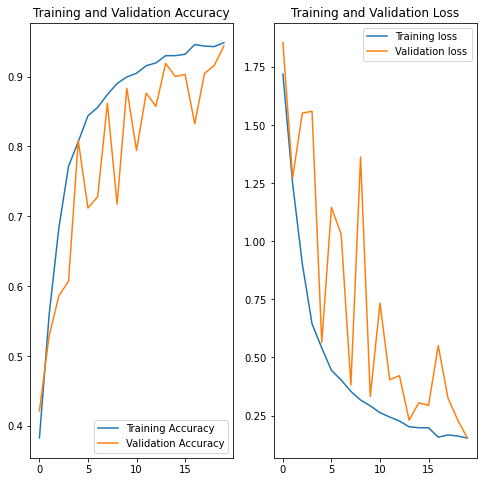

In [31]:
plt.figure(figsize=(8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), acc, label= 'Training Accuracy')
plt.plot(range(EPOCHS), val_acc, label= 'Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')


plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label= 'Training loss')
plt.plot(range(EPOCHS), val_loss, label= 'Validation loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()


First image to predict
Actual Label: Tomato_Spider_mites_Two_spotted_spider_mite
predicted Label: Tomato_Spider_mites_Two_spotted_spider_mite


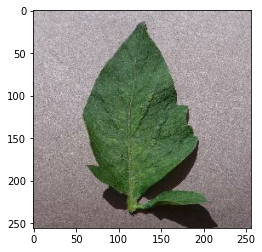

In [32]:
import numpy as np
for images_batch, labels_batch in test_ds.take(1):

    first_image = images_batch[0].numpy().astype("uint8")
    
    print("First image to predict")
    
    plt.imshow(first_image)
    
    print("Actual Label:", class_names[labels_batch[0].numpy()])
    
    batch_prediction = model.predict(images_batch)
    print("predicted Label:",class_names[np.argmax(batch_prediction[0])])

In [33]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0) # Create a batch
    
    predictions = model.predict(img_array)
    
    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

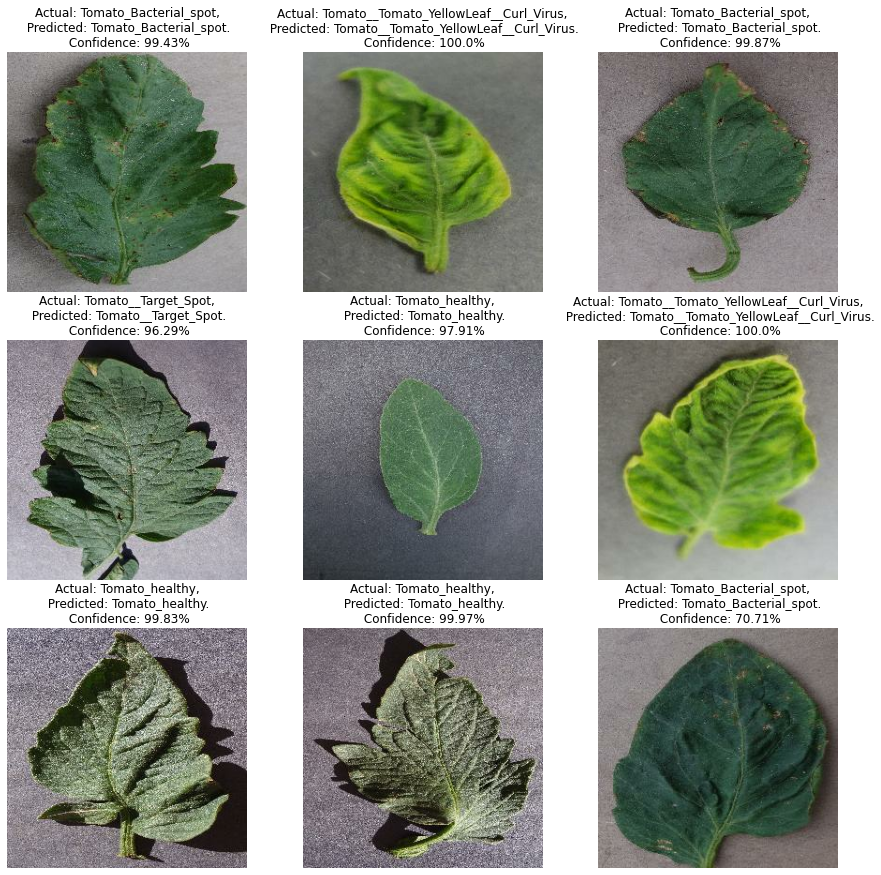

In [34]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        predicted_class , confidence = predict(model, images[i].numpy())
        
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        plt.axis("off")

In [38]:
import os
max ([int (i) for i in (os.listdir("./models")+[0])]) + 1

1